## Electrical Element Detector ##

First, I want to make using tensorflow an image classifier that seperates different electrical elements. After that, I plan to use the model in different applications. 
So, let's begin


So first, I will install my libraries that I will be using. It is important to note that I am using a virtual environment as I am using several versions of Python on my laptop and I will find it easy to depict with certainty the python and pip I am using with a virtual environment


In [2]:
!pip install opencv-python tensorflow matplotlib

In [3]:
!pip install --upgrade pip

In [4]:
import tensorflow as tf
import os

In [5]:
os.path.join('data','R')
os.path.join('data','vs')

'data/vs'

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('aug_data',batch_size=4)

Found 0 files belonging to 1 classes.


ValueError: No images found in directory aug_data. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

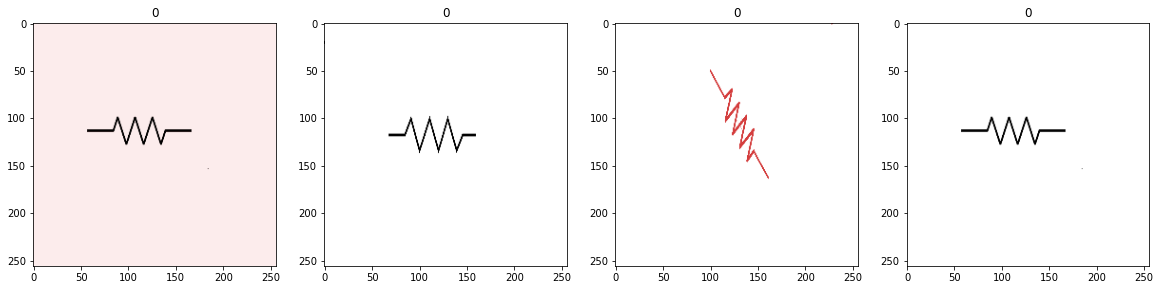

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x, y :(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

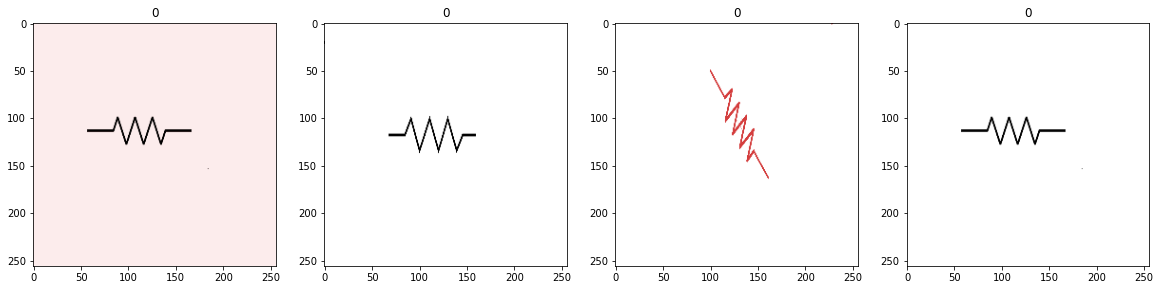

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

50

In [ ]:
train_size = 35
val_size = 8
test_size =7


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



## Deep Learning Model ##

In [ ]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train,epochs=50,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/50
35/35 [==============================] - 5s 127ms/step - loss: 0.6866 - accuracy: 0.5571 - val_loss: 0.6555 - val_accuracy: 0.5625
Epoch 2/50
35/35 [==============================] - 4s 125ms/step - loss: 0.4565 - accuracy: 0.7429 - val_loss: 0.2670 - val_accuracy: 0.8750
Epoch 3/50
35/35 [==============================] - 5s 131ms/step - loss: 0.2342 - accuracy: 0.9000 - val_loss: 0.1663 - val_accuracy: 0.9062
Epoch 4/50
35/35 [==============================] - 5s 131ms/step - loss: 0.1607 - accuracy: 0.9214 - val_loss: 0.3468 - val_accuracy: 0.8125
Epoch 5/50
35/35 [==============================] - 4s 125ms/step - loss: 0.0940 - accuracy: 0.9571 - val_loss: 0.1333 - val_accuracy: 0.9688
Epoch 6/50
35/35 [==============================] - 4s 121ms/step - loss: 0.0958 - accuracy: 0.9857 - val_loss: 0.0575 - val_accuracy: 1.0000
Epoch 7/50
35/35 [==============================] - 4s 123ms/step - loss: 0.1191 - accuracy: 0.9643 - val_loss: 0.1725 - val_accuracy: 0.9375
Epoch 

In [ ]:
hist.history

{'loss': [0.6866478323936462,
  0.45648258924484253,
  0.23420311510562897,
  0.16071774065494537,
  0.09401332587003708,
  0.09580925852060318,
  0.1190975159406662,
  0.038006942719221115,
  0.017677202820777893,
  0.019573982805013657,
  0.0017071095062419772,
  0.0020360739436000586,
  0.0006935958517715335,
  0.0017009442672133446,
  0.00036668425309471786,
  0.0002114730014000088,
  0.00032650629873387516,
  0.0003028560022357851,
  0.00014064059359952807,
  0.00010631389159243554,
  0.00012970845273230225,
  0.00011013453331543133,
  8.378166967304423e-05,
  8.229663944803178e-05,
  7.656990055693313e-05,
  5.9628287999657914e-05,
  5.710728873964399e-05,
  4.098082354175858e-05,
  5.521756975213066e-05,
  4.609372990671545e-05,
  4.469121267902665e-05,
  3.741986438399181e-05,
  3.767330417758785e-05,
  3.1072384444996715e-05,
  3.8118083466542885e-05,
  3.123892020084895e-05,
  3.375002779648639e-05,
  3.097474109381437e-05,
  2.1045345420134254e-05,
  3.281079261796549e-05,
 

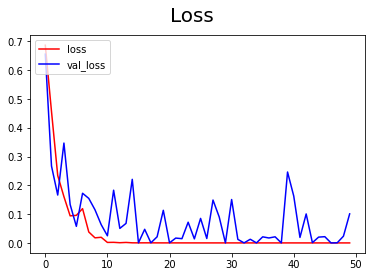

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='blue',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

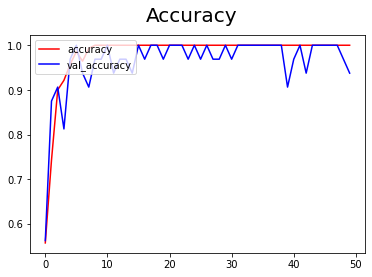

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='blue',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [22]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    acc.update_state(y,yhat)


1/1 [==============================] - 0s 56ms/step


In [ ]:
print(precision.result().numpy(), recall.result().numpy(), acc.result().numpy())

1.0 0.875 0.9285714


In [ ]:
import cv2

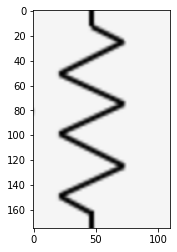

In [ ]:
img = cv2.imread('Rii.png')
plt.imshow(img)
plt.show()

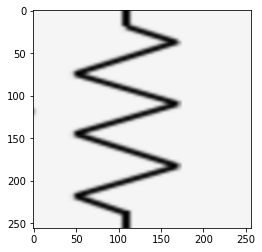

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [ ]:
yhat

array([[0.00104061]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Voltage Source')
    
else:
    print(f'Predicted class is Resistor')

Predicted class is Resistor


Okay, so my thinking here is to augment the data by performing some rotations and also to add more symbols. 

In [ ]:
!pip install albumentations

  Using cached albumentations-1.1.0-py3-none-any.whl (102 kB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)


In [ ]:
!pip install augmentor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=c575e6591908acb0717bded2e74c7893dd24263ed16679651b80f82af458514c
  Stored in directory: /Users/oreadeniyi/Library/Caches/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future


In [ ]:
import albumentations as alb
import Augmentor as aug


In [ ]:
aug??

Type:        module
String form: <module 'Augmentor' from '/Users/oreadeniyi/Desktop/CircuitsAI/project_env/lib/python3.8/site-packages/Augmentor/__init__.py'>
File:        ~/Desktop/CircuitsAI/project_env/lib/python3.8/site-packages/Augmentor/__init__.py
Source:     
"""
The Augmentor image augmentation library.

Augmentor is a software package for augmenting image data. It provides a number of utilities that aid augmentation \
in a automated manner. The aim of the package is to make augmentation for machine learning tasks less prone to \
error, more reproducible, more efficient, and easier to perform.

.. moduleauthor:: Marcus D. Bloice <marcus.bloice@medunigraz.at>
   :platform: Windows, Linux, Macintosh
   :synopsis: An image augmentation library for Machine Learning.

"""

from .Pipeline import Pipeline, DataFramePipeline, DataPipeline

__author__ = """Marcus D. Bloice"""
__email__ = 'marcus.bloice@medunigraz.at'
__version__ = '0.2.10'

__all__ = ['Pipeline', 'DataFramePipeline', 

Declare an augmentation pipeline

In [ ]:
!mkdir aug_data

mkdir: aug_data: File exists


In [ ]:
image_pipeline = aug.Pipeline("data/R")

Initialised with 10 image(s) found.
Output directory set to data/R/output.

In [ ]:
image_pipeline.random_color??

Signature: image_pipeline.random_color(probability, min_factor, max_factor)
Source:   
    def random_color(self,probability,min_factor,max_factor):
        """
        Random change saturation of an image.

        :param probability: Controls the probability that the operation is
         performed when it is invoked in the pipeline.
        :param min_factor: The value between 0.0 and max_factor that define the minimum adjustment of image saturation.
         The value 0.0 gives a black and white image, value 1.0 gives the original image.
        :param max_factor: A value should be bigger than min_factor that define the maximum adjustment of image saturation.
         The value 0.0 gives a black and white image, value 1.0 gives the original image.
        :return: None
        """
        if not 0 < probability <= 1:
            raise ValueError(Pipeline._probability_error_text)
        elif not 0 <= min_factor <= max_factor:
            raise ValueError("The min_factor must be bet

In [ ]:
image_pipeline.rotate(probability=0.7,max_left_rotation=12.5,max_right_rotation=12.5)
image_pipeline.random_color(probability=0.5,min_factor=0.3,max_factor=.7)
image_pipeline.flip_random(probability=0.5)
image_pipeline.random_distortion(probability=0.5,grid_height=6,grid_width=6,magnitude=5)
image_pipeline.scale(probability=0.7,scale_factor=1.5)

In [ ]:
image_pipeline.sample(1000)

Processing <PIL.Image.Image image mode=RGBA size=1315x834 at 0x7F9C8FC91F10>: 100%|██████████| 1000/1000 [01:27<00:00, 11.44 Samples/s]               


So, I'll add this at the top of the tensorflow pipeline

I defined a function in case I require more classes. 

In [ ]:
def ImagePipeline(filename):
    image_pipeline = aug.Pipeline(filename)
    image_pipeline.rotate(probability=0.7,max_left_rotation=12.5,max_right_rotation=12.5)
    image_pipeline.random_color(probability=0.5,min_factor=0.3,max_factor=.7)
    image_pipeline.flip_random(probability=0.5)
    image_pipeline.random_distortion(probability=0.5,grid_height=6,grid_width=6,magnitude=5)
    image_pipeline.scale(probability=0.7,scale_factor=1.5)
    image_pipeline.rotate180(probability=0.5)
    image_pipeline.rotate270(probability=0.5)
    image_pipeline.rotate90(probability=0.5)
    image_pipeline.sample(9000)
    image_pipeline.process()
   
    
    
    

In [ ]:
ImagePipeline("data/vs")
ImagePipeline("data/R")


Initialised with 10 image(s) found.
Output directory set to data/vs/output.

Processing <PIL.Image.Image image mode=RGB size=924x1204 at 0x7F9C9E151A60>: 100%|██████████| 9000/9000 [11:17<00:00, 13.29 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=1204x924 at 0x7F9C9E151D60>: 100%|██████████| 10/10 [00:01<00:00,  8.07 Samples/s] 


Initialised with 10 image(s) found.
Output directory set to data/R/output.

Processing <PIL.Image.Image image mode=RGBA size=976x519 at 0x7F9CEFCCEE50>: 100%|██████████| 9000/9000 [12:32<00:00, 11.97 Samples/s]                 
Processing <PIL.Image.Image image mode=RGBA size=1299x2737 at 0x7F9C8261BBE0>: 100%|██████████| 10/10 [00:01<00:00,  9.79 Samples/s]


Found 20060 files belonging to 2 classes.


2022-05-30 22:24:25.843437: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


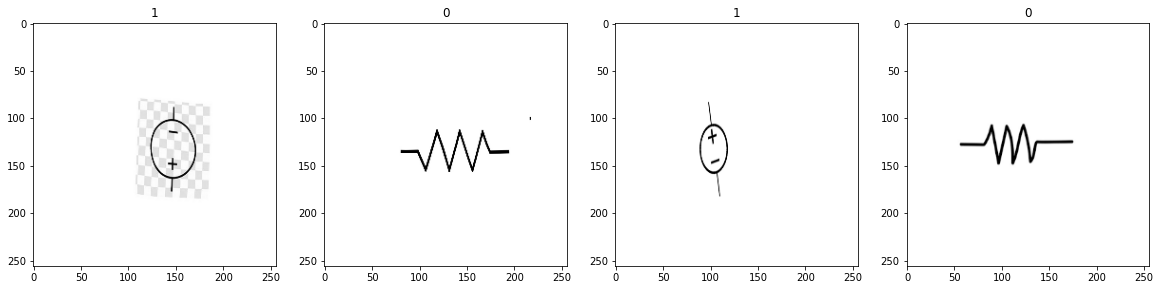

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data',batch_size=4)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [9]:
data = data.map(lambda x, y :(x/255,y))


In [10]:
len(data)

5015

In [11]:
train_size=3009
test_size=1003
val_size=1003

In [12]:

len(data)== (train_size+test_size+val_size)

True

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


## Deep Learning Model ##

In [14]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [15]:
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [16]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",mode="min",patience=0,restore_best_weights=True,verbose=1)
hist = model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback,earlystopping])


Epoch 1/30
3009/3009 [==============================] - 619s 205ms/step - loss: 0.1608 - accuracy: 0.9226 - val_loss: 0.0292 - val_accuracy: 0.9945
Epoch 2/30
3009/3009 [==============================] - 585s 195ms/step - loss: 0.0185 - accuracy: 0.9951 - val_loss: 0.0120 - val_accuracy: 0.9983
Epoch 3/30
3009/3009 [==============================] - 593s 197ms/step - loss: 0.0229 - accuracy: 0.9939 - val_loss: 8.5181e-04 - val_accuracy: 0.9998
Epoch 4/30
3009/3009 [==============================] - 611s 203ms/step - loss: 7.5579e-05 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9998
Epoch 5/30
3009/3009 [==============================] - 573s 190ms/step - loss: 3.7964e-06 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9995
Epoch 6/30
3009/3009 [==============================] - 545s 181ms/step - loss: 3.8413e-07 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9998
Epoch 7/30
3009/3009 [==============================] - 583s 194ms/step - loss: 7.9386e-08 - acc

Okay, after this, I have decided to start thinking up the other sets of data that I would need

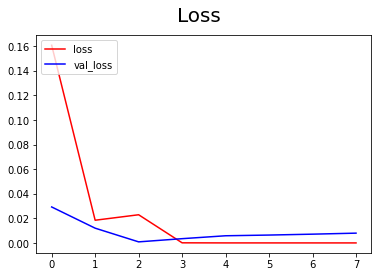

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='blue',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

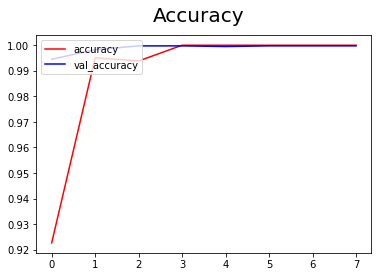

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='blue',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 47ms/step


In [ ]:
print(precision.result().numpy(), recall.result().numpy(), acc.result().numpy())

0.99231505 0.98287344 0.9874275


In [26]:
import cv2

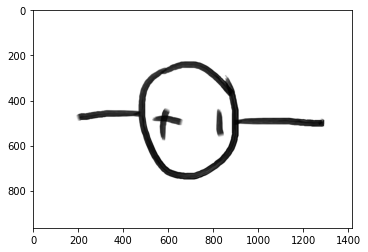

In [54]:
img = cv2.imread('vs55.png')


plt.imshow(img)
plt.show()

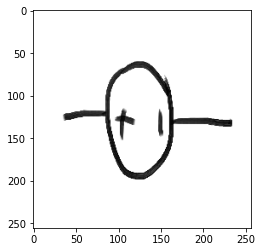

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 60ms/step


array([[1.]], dtype=float32)

In [58]:
if yhat > 0.5: 
    print(f'Predicted class is Voltage Source')
    
else:
    print(f'Predicted class is Resistor')

Predicted class is Voltage Source


## Saving the model ##

In [60]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))



In [63]:
new_model = load_model('models/imageclassifier.h5')


In [64]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 180ms/step


array([[1.]], dtype=float32)